# Разведочный анализ данных.

#### Подключение требуемых библиотек для анализа данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skl
import tensorflow as tf

#### Загрузка данных из Excel и объединение в один датасет.

In [2]:
df_bp=pd.read_excel('Data/X_bp.xlsx', index_col=0)
df_nup=pd.read_excel('Data/X_nup.xlsx', index_col=0)
df=df_bp.merge(df_nup, left_index=True, right_index=True, how='inner')

#### Вывод наименования столбцов и общей информации по итоговому датасету:

In [3]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [5]:
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


#### Вывод описательной статистики датасета:

In [6]:
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


#### Построение гистограм распределения переменных:

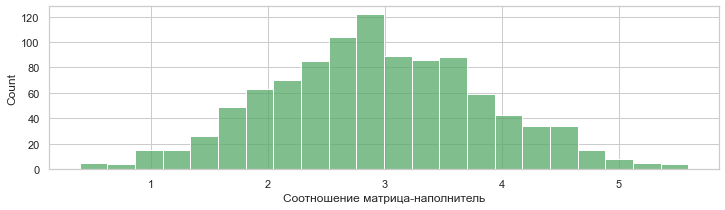

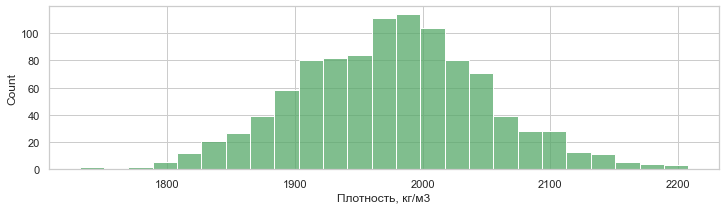

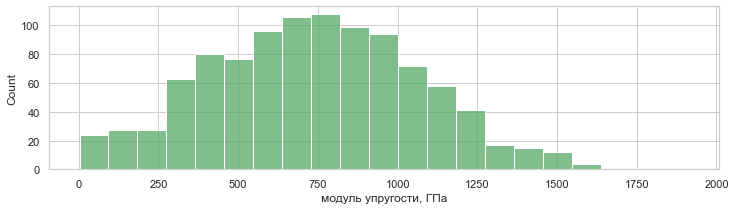

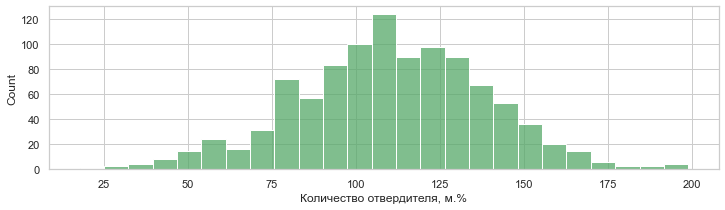

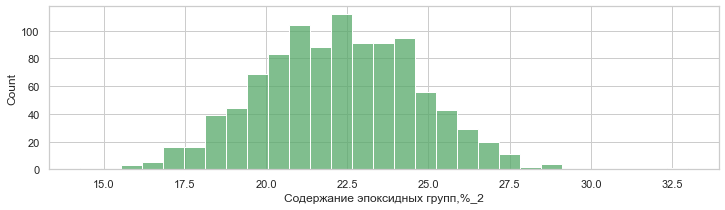

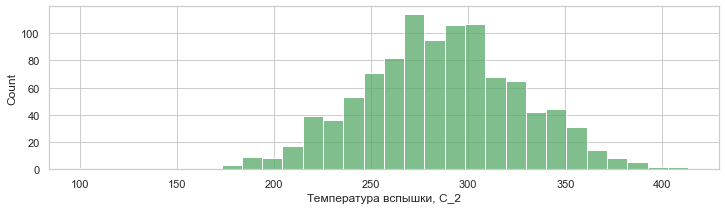

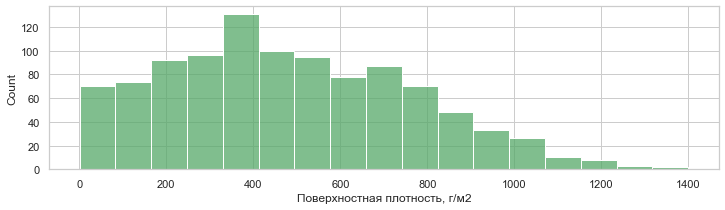

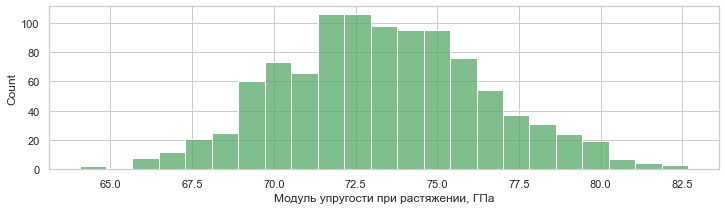

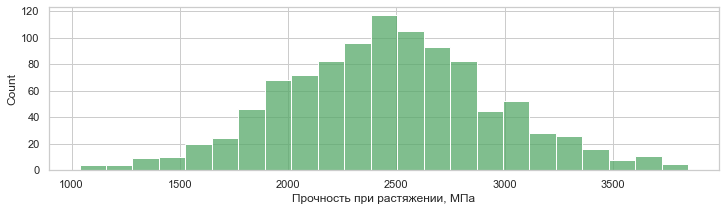

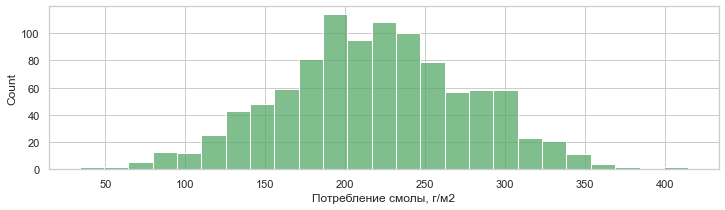

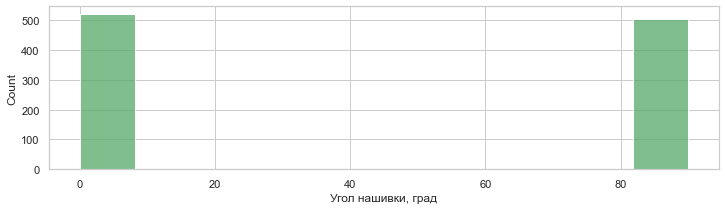

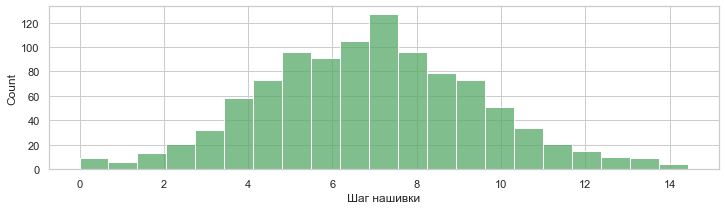

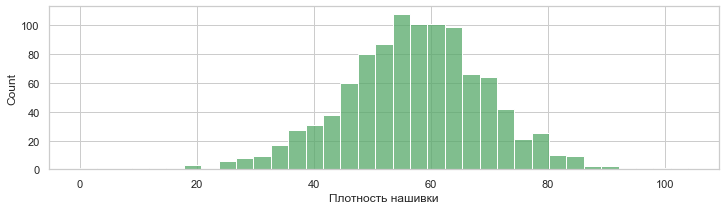

In [7]:
sns.set(style='whitegrid')
for col in df.columns:
    plt.figure(figsize=(12,3))
    sns.histplot(x=col, data=df, color="g")
    plt.show()

##### Предварительный анализ показал, что параметр "Угол нашивки" - категориальная перемнная и принимает значения 0 или 90 градусов.
##### Сдвинем столбец "Угол нашивки" в конец датафрейма для удобства дальнейшей манипуляций с колличественными пременными по индексам колонок:

In [8]:
df=df[['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Шаг нашивки', 'Плотность нашивки', 'Угол нашивки, град']]

#### Построение диаграмм "Ящик с усами" для анализа выбросов данных:

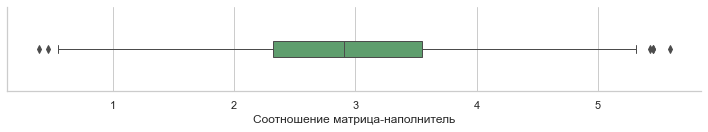

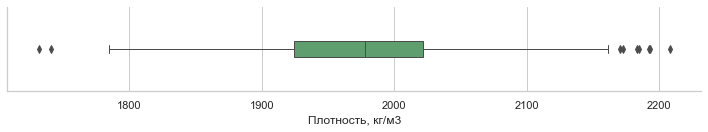

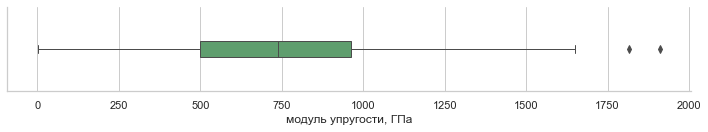

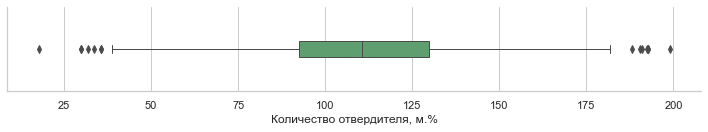

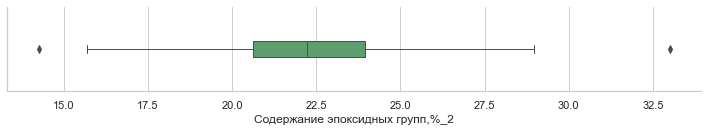

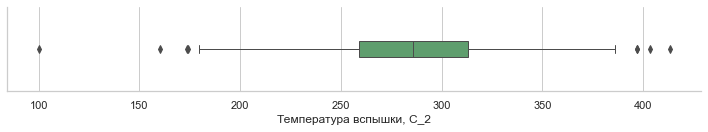

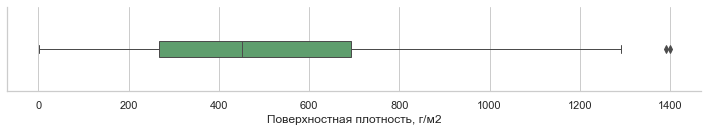

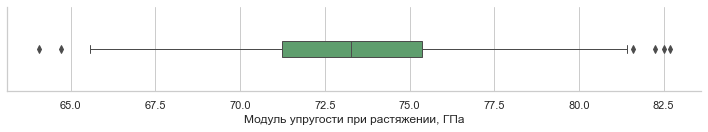

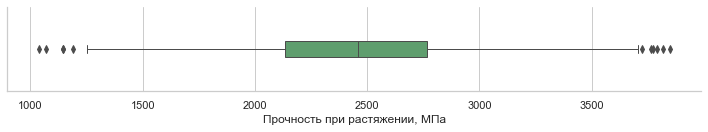

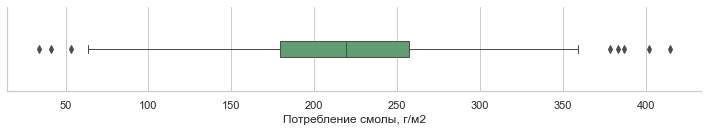

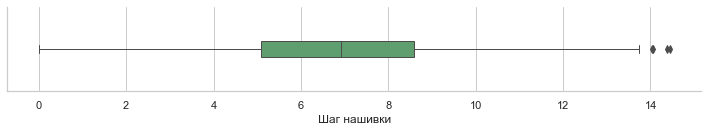

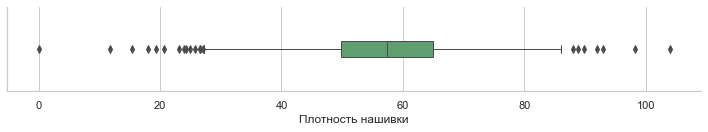

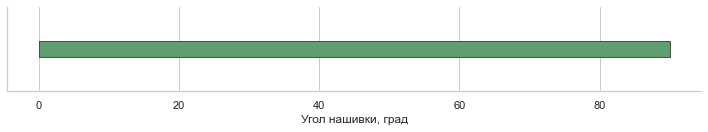

In [9]:
for col in df.columns:
    sns.catplot(x=col, data=df, kind="box", height=2, width=0.2, aspect=5, linewidth=1, color="g")

#### Построение корреляционной матрицы:

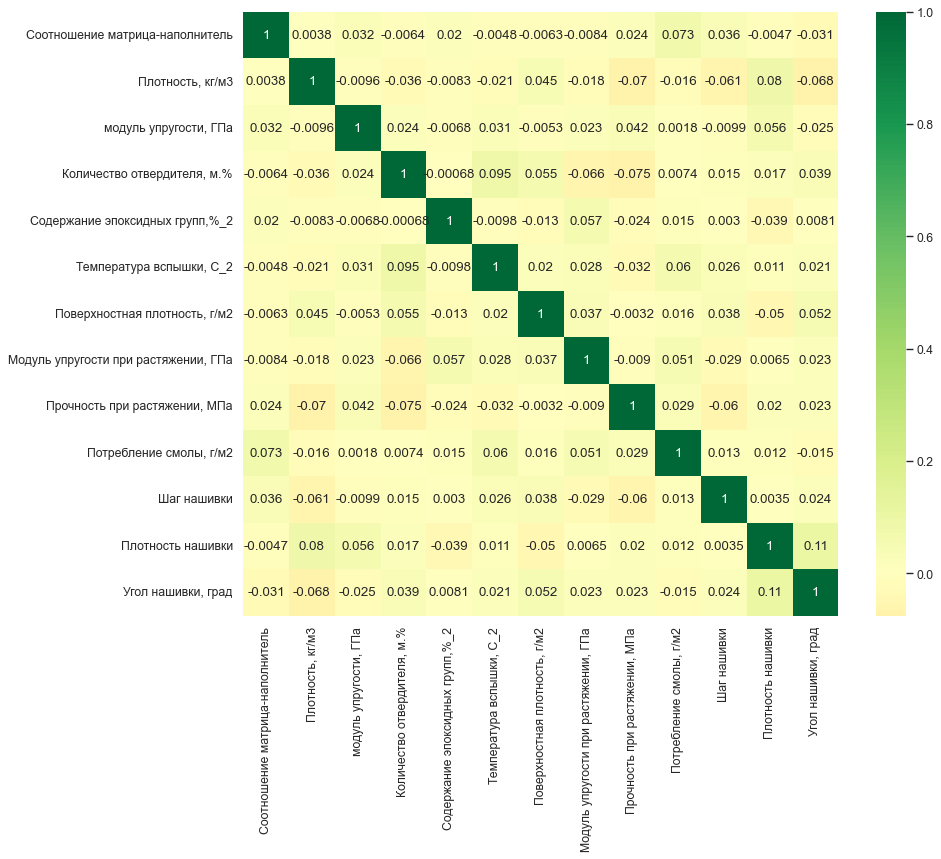

In [10]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.show()

#### Построение парных диаграмм рассеяния исследуемых величин с разбивкой по категориальной перемнной:

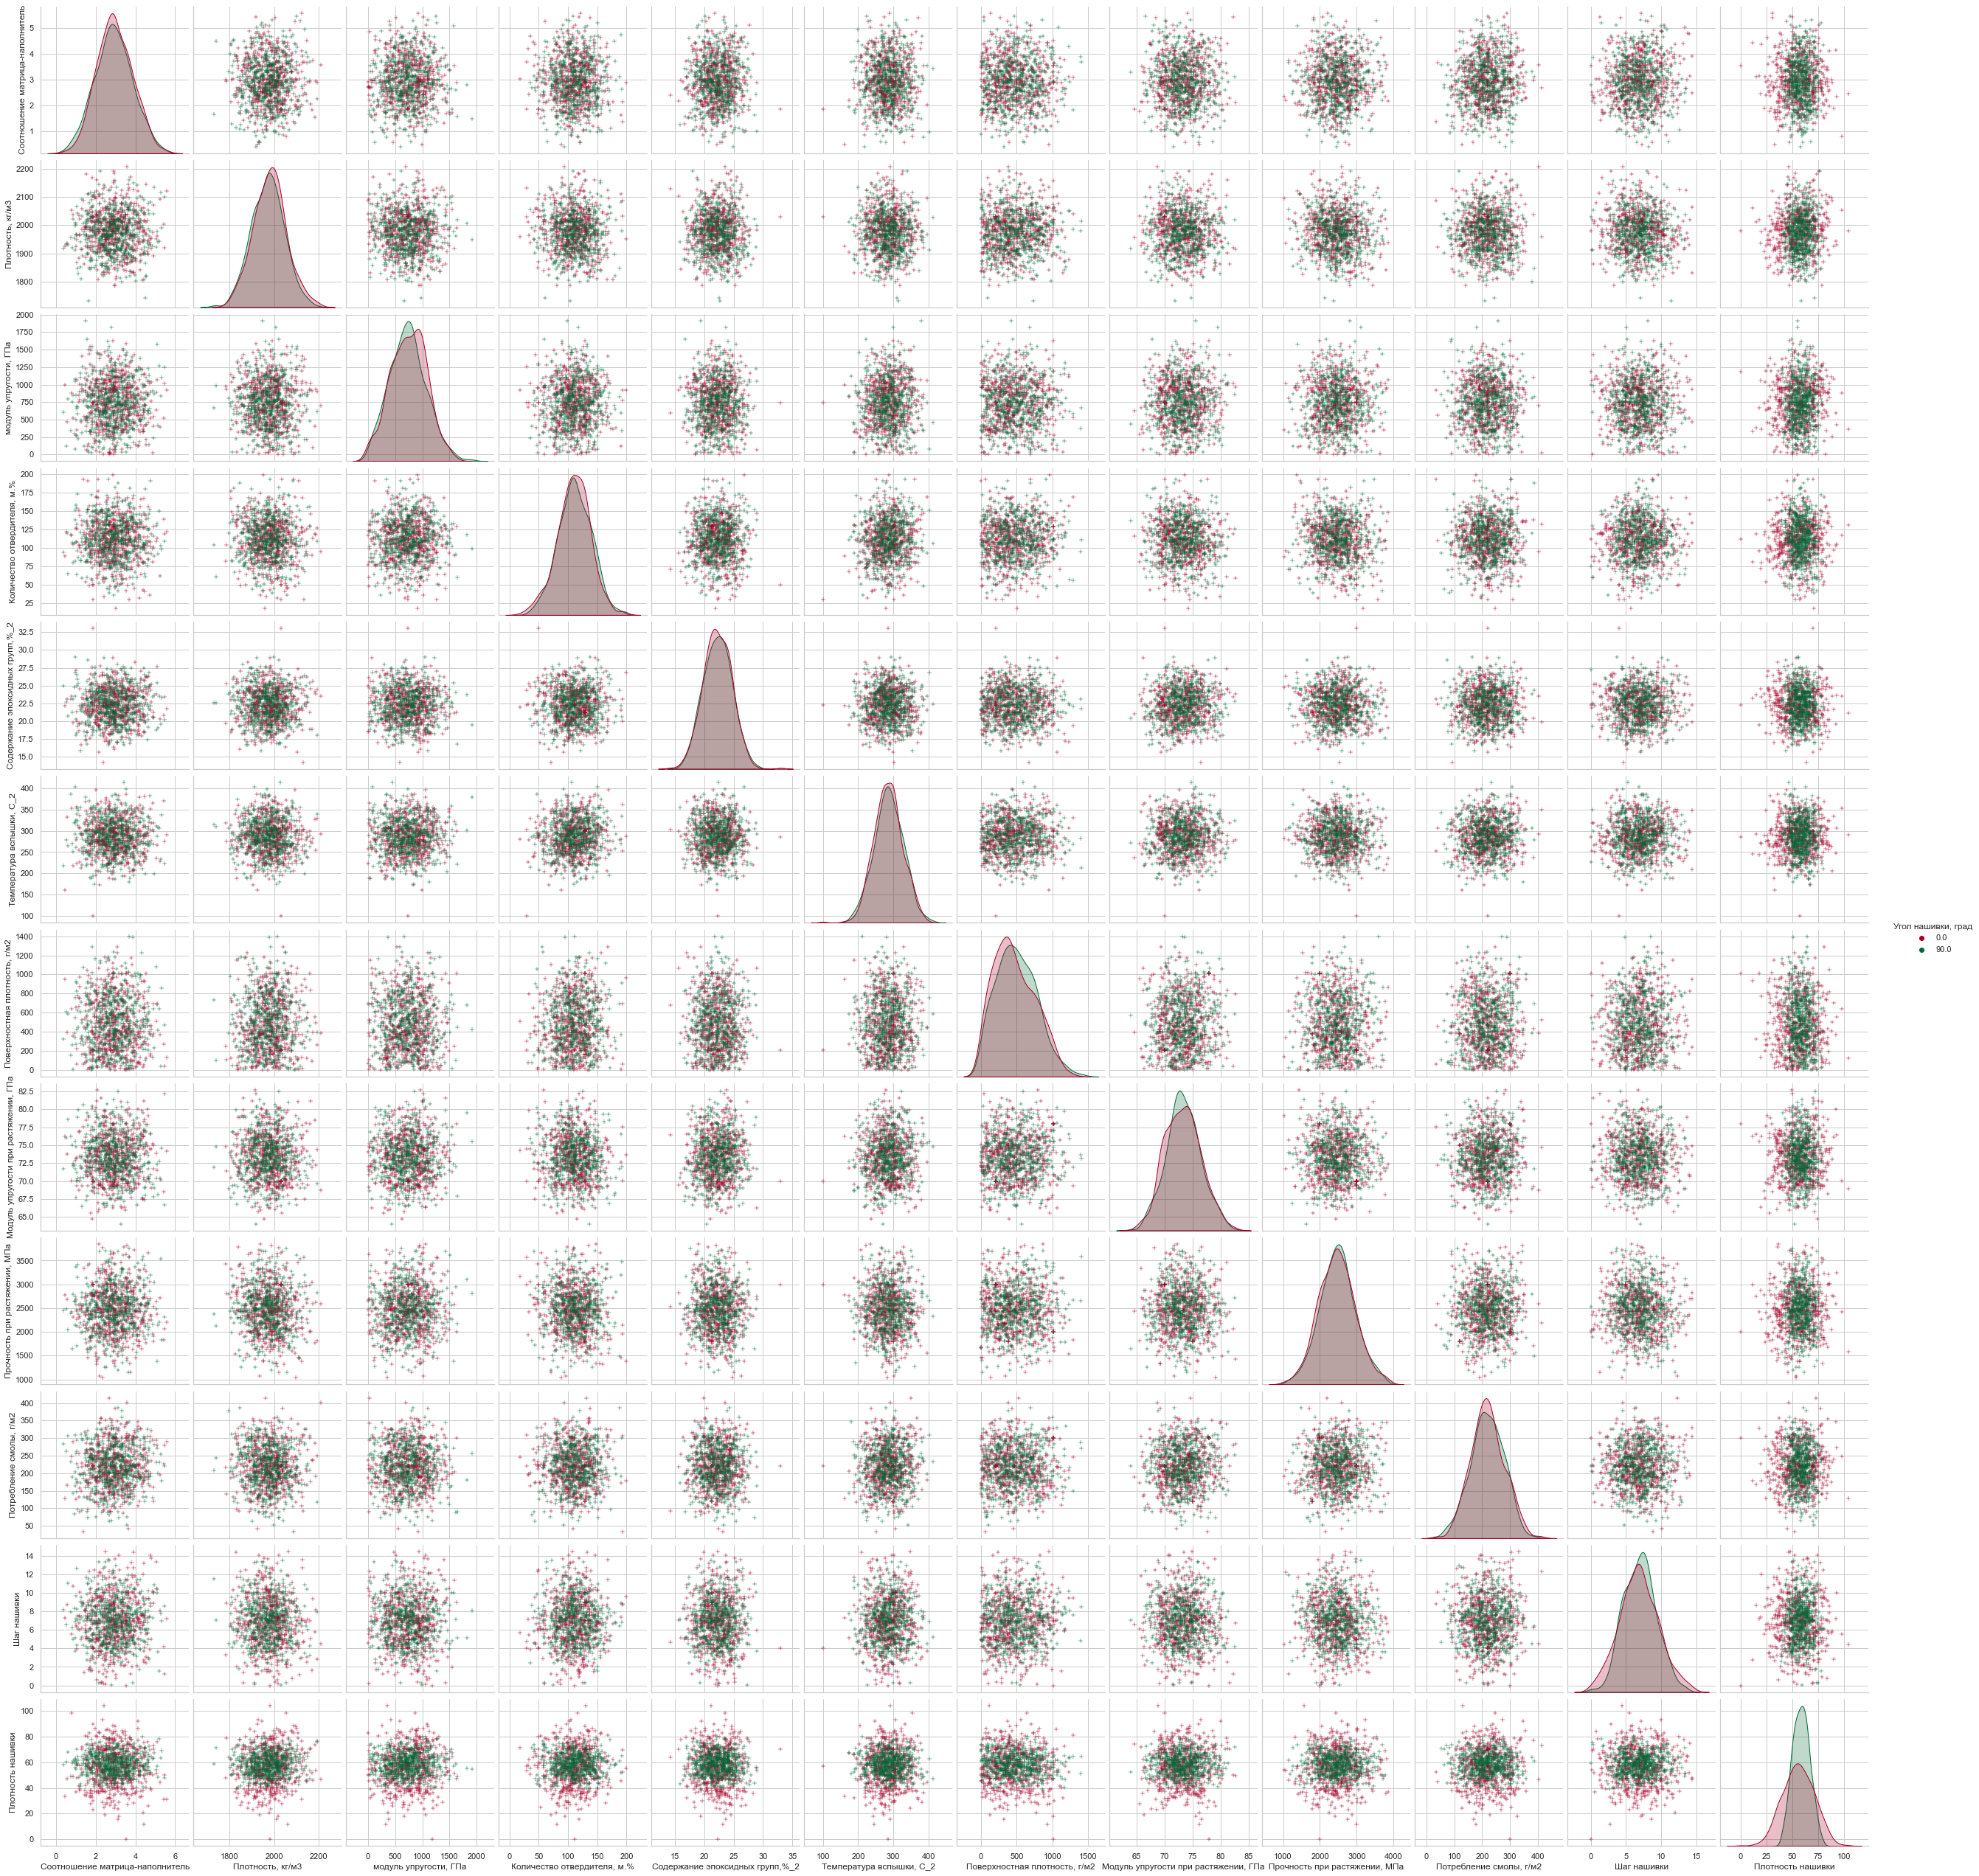

In [11]:
sns.pairplot(df, hue='Угол нашивки, град',  height=3, aspect=1, palette='RdYlGn', markers="+")

##### Наблюдается отсутсвие выраженных корреляций и видимых парных функциональных зависимостей между величинами.
#### Замена выбросов данных на ячейки NaN для дальнейшего их удаления:

In [12]:
for col in df.columns:
    q75,q25 = np.percentile(df.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

#### Количество выбросов по столбцам:

In [13]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Шаг нашивки                              4
Плотность нашивки                       21
Угол нашивки, град                       0
dtype: int64

#### Удаление выбросов:

In [14]:
df=df.dropna()
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,4.000000,60.000000,0.0
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,5.000000,47.000000,0.0
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,5.000000,57.000000,0.0
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,5.000000,60.000000,0.0
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,5.000000,70.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,9.076380,47.019770,90.0
1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,10.565614,53.750790,90.0
1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,4.161154,67.629684,90.0
1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,6.313201,58.261074,90.0


In [15]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Шаг нашивки                             0
Плотность нашивки                       0
Угол нашивки, град                      0
dtype: int64

#### Масштабирование датасета для правильного построения моделей анализа и прогнозирования данных:

In [16]:
df_s=pd.DataFrame(skl.StandardScaler().fit_transform(df), columns=df.columns)
df_s

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки,"Угол нашивки, град"
0,-1.196260,0.790727,0.001489,-2.254199,0.643790,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-1.162360,0.226834,-1.023787
1,-1.196260,0.790727,0.001489,0.669189,-0.400666,0.354488,-0.974837,-1.088732,1.148666,0.041294,-0.763689,-0.930436,-1.023787
2,-0.172802,0.790727,0.044904,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,-0.040228,-1.023787
3,-0.176623,0.366820,0.029685,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,0.226834,-1.023787
4,-0.398622,-0.904900,0.209271,0.034925,0.024577,-0.036187,-0.974837,-1.088732,1.148666,0.041294,-0.763689,1.117043,-1.023787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,-0.732548,-0.310188,0.531478,-0.885307,-0.871403,0.983609,-0.977698,-0.070548,-0.172989,-1.602276,0.861447,-0.928676,0.976766
932,0.580295,1.074592,-0.893411,1.297605,-1.090103,-0.808159,-0.472549,-0.126591,-0.231014,-1.728193,1.455162,-0.329475,0.976766
933,0.397344,-0.023557,-0.978322,-0.014163,0.730480,-0.955250,0.918256,0.470794,0.421529,0.328626,-1.098113,0.906035,0.976766
934,0.872860,1.310716,0.009825,1.127974,-1.237507,-0.260555,0.565897,0.242965,-0.853711,-0.354474,-0.240153,0.072034,0.976766


#### Групповая диаграмма плотностей распределения количественных переменных итогового датасета:

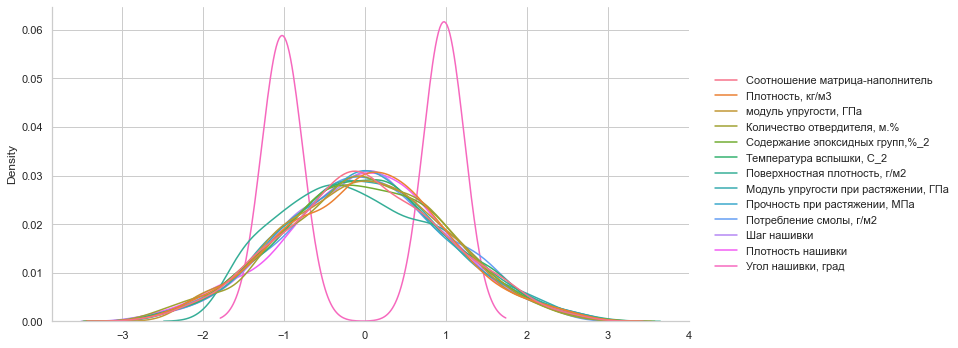

In [17]:
sns.displot(data=df_s, kind="kde", height=5, aspect=2)

# Регрессионный анализ.

#### Разбиение датасета на входные перменные (X) и выходные (Y):

In [18]:
X=df_s.drop(columns=['Соотношение матрица-наполнитель','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'])
Y=df_s[['Соотношение матрица-наполнитель','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]

## Линейная регрессия:

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
df_metrics=pd.DataFrame()
LR=LinearRegression()
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    LR.fit(X_train, y_train)
    train_prediction=LR.predict(X_train)
    test_prediction=LR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')
    df_metrics=df_metrics.append({'':col, 'LinearRegression (r2_train)':metrics.r2_score(y_train, train_prediction),
                                  'LinearRegression (r2_test)':metrics.r2_score(y_test, test_prediction)}, ignore_index=True)

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: 0.021085055034547606
Коэффициент детерминации тестовой выборки: -0.04652129053308163 

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.02560960607526086
Коэффициент детерминации тестовой выборки: -0.039050576646955104 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.014798265825566426
Коэффициент детерминации тестовой выборки: 0.015346171407936371 



In [68]:
df_metrics.T

,0,1,2
,Соотношение матрица-наполнитель,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
LinearRegression (r2_train),0.021085,0.02561,0.014798
LinearRegression (r2_test),-0.046521,-0.039051,0.015346


#### Перекрёстная проверка линейной регрессии:

In [21]:
from sklearn.model_selection import cross_val_score
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    scores=cross_val_score(LR, X_train, y_train, cv=5, scoring='r2')
    train_prediction=LR.predict(X_train)
    test_prediction=LR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: -0.020346103211049238
Коэффициент детерминации тестовой выборки: -0.015261836629290482 

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.004192780902808169
Коэффициент детерминации тестовой выборки: -0.015185369481069078 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.014798265825566426
Коэффициент детерминации тестовой выборки: 0.015346171407936371 



## Метод случайного леса:

In [22]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100)
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    RFR.fit(X_train, y_train)
    train_prediction=RFR.predict(X_train)
    test_prediction=RFR.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: 0.8540543847408897
Коэффициент детерминации тестовой выборки: -0.07326054195372667 

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.8518914712828467
Коэффициент детерминации тестовой выборки: -0.06954646589202862 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.8523545926108129
Коэффициент детерминации тестовой выборки: -0.08976059059335517 



#### Поиск по сетке метода случайного леса:

In [23]:
from sklearn.model_selection import GridSearchCV
grid_param={'n_estimators': np.arange(100,500,100), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6],}
GSCV=GridSearchCV(RFR, grid_param, scoring='r2', cv=5, n_jobs=-1)
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    GSCV.fit(X_train, y_train)
    model=GSCV.best_estimator_
    model.fit(X_train, y_train)
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    print(col)
    print('Лучшие параметры:', GSCV.best_estimator_)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')

Соотношение матрица-наполнитель
Лучшие параметры: RandomForestRegressor(max_depth=6, max_features='log2')
Коэффициент детерминации обучающей выборки: 0.31847404087925324
Коэффициент детерминации тестовой выборки: -0.05716845531726977 

Модуль упругости при растяжении, ГПа
Лучшие параметры: RandomForestRegressor(max_depth=4, max_features='log2', n_estimators=300)
Коэффициент детерминации обучающей выборки: 0.1533552721192688
Коэффициент детерминации тестовой выборки: -0.03248828099065548 

Прочность при растяжении, МПа
Лучшие параметры: RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=400)
Коэффициент детерминации обучающей выборки: 0.15709632797288453
Коэффициент детерминации тестовой выборки: -0.005605886102316049 



## Метод ближайших соседей:

In [24]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=10)
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    KNN.fit(X_train, y_train)
    train_prediction=KNN.predict(X_train)
    test_prediction=KNN.predict(X_test)
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: 0.12630476652656397
Коэффициент детерминации тестовой выборки: -0.08419548501681473 

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.1314274941122473
Коэффициент детерминации тестовой выборки: -0.09916262447930624 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.13721628294527743
Коэффициент детерминации тестовой выборки: -0.17194304997101395 



#### Поиск по сетке метода ближайших соседей:

In [25]:
grid_param={'n_neighbors': np.arange(2,500)}
GSCV=GridSearchCV(KNN, grid_param, scoring='r2', cv=5, n_jobs=-1)
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    GSCV.fit(X_train, y_train)
    model=GSCV.best_estimator_
    model.fit(X_train, y_train)
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    print(col)
    print('Лучшие параметры:', GSCV.best_estimator_)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_prediction))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_prediction), '\n')

Соотношение матрица-наполнитель
Лучшие параметры: KNeighborsRegressor(n_neighbors=171)
Коэффициент детерминации обучающей выборки: 0.005919744032176544
Коэффициент детерминации тестовой выборки: -0.033646943319693756 

Модуль упругости при растяжении, ГПа
Лучшие параметры: KNeighborsRegressor(n_neighbors=159)
Коэффициент детерминации обучающей выборки: 0.007619886033031875
Коэффициент детерминации тестовой выборки: -0.012147036334315464 

Прочность при растяжении, МПа
Лучшие параметры: KNeighborsRegressor(n_neighbors=497)
Коэффициент детерминации обучающей выборки: 0.0009801454413911337
Коэффициент детерминации тестовой выборки: 0.0017633012948068405 



## Среднее значение как предсказание:

In [26]:
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    train_mean=np.full(len(y_train), y_train.mean())
    test_mean=np.full(len(y_test), y_train.mean())
    print(col)
    print('Коэффициент детерминации обучающей выборки:', metrics.r2_score(y_train, train_mean))
    print('Коэффициент детерминации тестовой выборки:', metrics.r2_score(y_test, test_mean), '\n')

Соотношение матрица-наполнитель
Коэффициент детерминации обучающей выборки: 0.0
Коэффициент детерминации тестовой выборки: -0.026262099381987314 

Модуль упругости при растяжении, ГПа
Коэффициент детерминации обучающей выборки: 0.0
Коэффициент детерминации тестовой выборки: -0.0031413752563778097 

Прочность при растяжении, МПа
Коэффициент детерминации обучающей выборки: 0.0
Коэффициент детерминации тестовой выборки: -0.0037442284665589742 



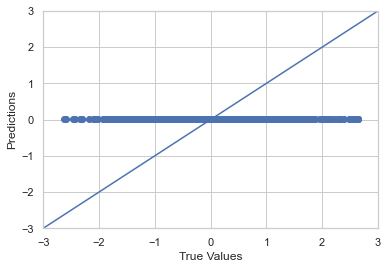

In [27]:
#a = plt.axes(aspect='equal')
plt.scatter(y_train, train_mean)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-3, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

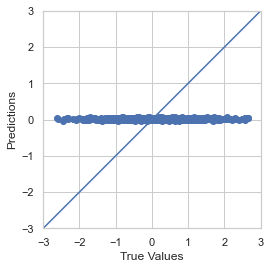

In [28]:
a = plt.axes(aspect='equal')
plt.scatter(y_train, train_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-3, 3]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Нейронные сети.

In [29]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(20, 2), random_state=1, max_iter=2000, activation='relu', solver='adam')
for col in Y.columns:
    X_train, X_test, y_train, y_test=train_test_split(X, Y[col], test_size=0.3, random_state=92)
    MLP.fit(X_train, y_train)
    y_pred=MLP.predict(X_test)
    print(col)
    print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pred))
    print('Коэффициент детерминации:', metrics.r2_score(y_test, y_pred), '\n')

Соотношение матрица-наполнитель
Средняя квадратическая ошибка: 1.3215796573241545
Коэффициент детерминации: -0.4010531364028842 

Модуль упругости при растяжении, ГПа
Средняя квадратическая ошибка: 1.2302801649170725
Коэффициент детерминации: -0.17148881757669332 

Прочность при растяжении, МПа
Средняя квадратическая ошибка: 0.8828813529848413
Коэффициент детерминации: -0.006300940483469963 



In [30]:
from tensorflow import keras
from tensorflow.keras import layers